In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv(r'C:\Users\anura\Downloads\Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
from pycaret.classification import *
s = setup(data, target = 'Exited', ignore_features = ['CustomerId'])

,Description,Value
0,Session id,2466
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 15)"
5,Transformed train set shape,"(7000, 15)"
6,Transformed test set shape,"(3000, 15)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,9


In [5]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8167,0.7715,0.3290,0.5876,0.4206,0.3226,0.3420,0.1490
rf,Random Forest Classifier,0.8110,0.7448,0.3346,0.5587,0.4177,0.3137,0.3287,0.2150
catboost,CatBoost Classifier,0.8177,0.7422,0.3921,0.5741,0.4644,0.3600,0.3700,1.8930
nb,Naive Bayes,0.7823,0.7411,0.0652,0.3172,0.1074,0.0435,0.0604,0.1780
gbc,Gradient Boosting Classifier,0.8170,0.7249,0.3690,0.5771,0.4489,0.3461,0.3590,0.2840
ada,Ada Boost Classifier,0.8060,0.7070,0.3668,0.5340,0.4340,0.3221,0.3307,0.2550
xgboost,Extreme Gradient Boosting,0.8067,0.7022,0.3767,0.5345,0.4406,0.3285,0.3364,0.1070
lightgbm,Light Gradient Boosting Machine,0.8089,0.6967,0.3802,0.5412,0.4452,0.3347,0.3428,0.2990
lr,Logistic Regression,0.7900,0.6721,0.0610,0.3966,0.1054,0.0546,0.0861,1.9910
lda,Linear Discriminant Analysis,0.7506,0.6340,0.1726,0.3046,0.2200,0.0848,0.0899,0.0460


In [6]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2466, verbose=0, warm_start=False)


In [7]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7986,0.7742,0.0070,1.0000,0.0140,0.0112,0.0750
1,0.7971,0.8036,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8000,0.7675,0.0141,1.0000,0.0278,0.0223,0.1061
3,0.7971,0.7484,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7971,0.7423,0.0070,1.0000,0.0139,0.0111,0.0746
5,0.7986,0.7502,0.0140,1.0000,0.0276,0.0221,0.1056
6,0.7957,0.7499,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7929,0.7761,0.0000,0.0000,0.0000,-0.0057,-0.0271
8,0.7971,0.7280,0.0070,1.0000,0.0139,0.0111,0.0746


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
plot_model(tuned_best_model, plot="parameter")
print(f"Model: {type(tuned_best_model)}")

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


Model: <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>


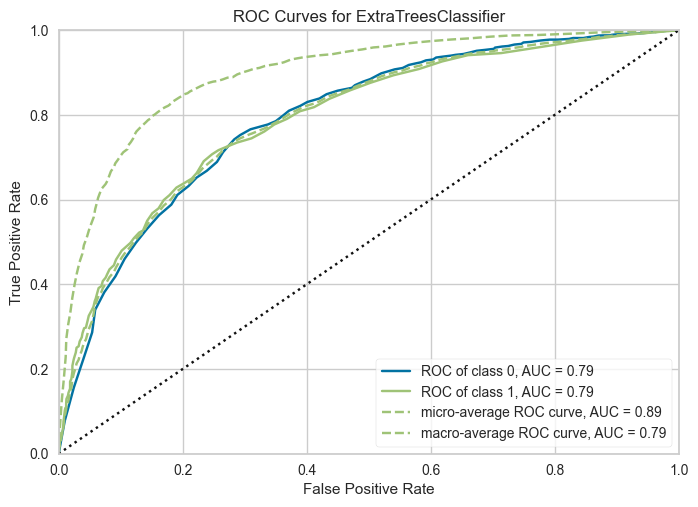

In [8]:
plot_model(tuned_best_model, plot = 'auc')

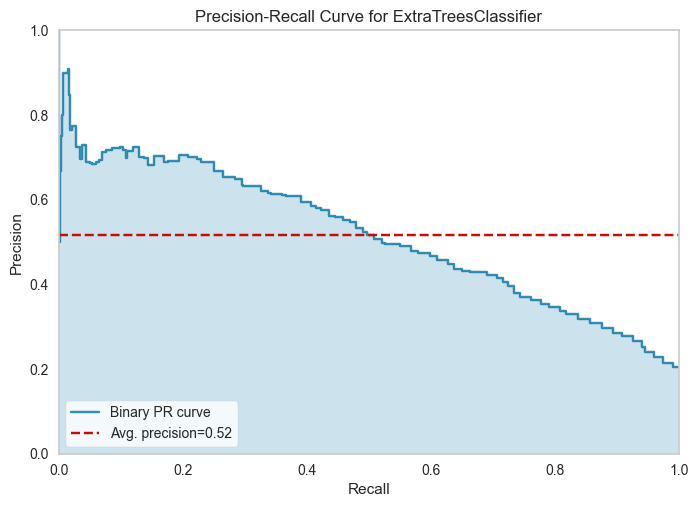

In [13]:
plot_model(tuned_best_model, plot="pr")

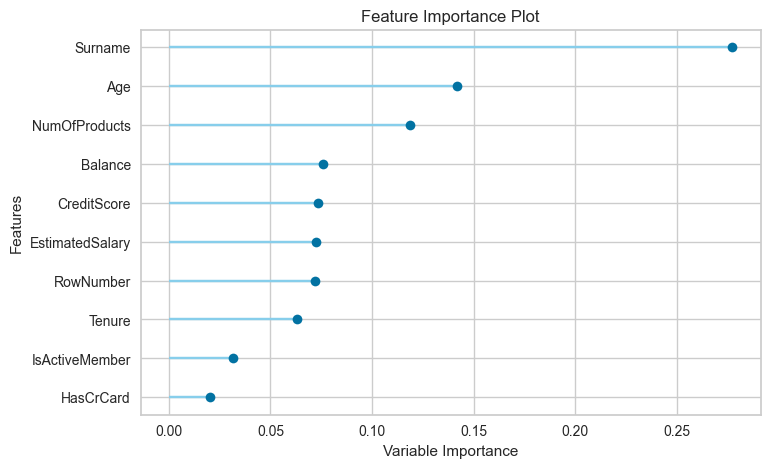

In [10]:
plot_model(tuned_best_model, plot = 'feature')

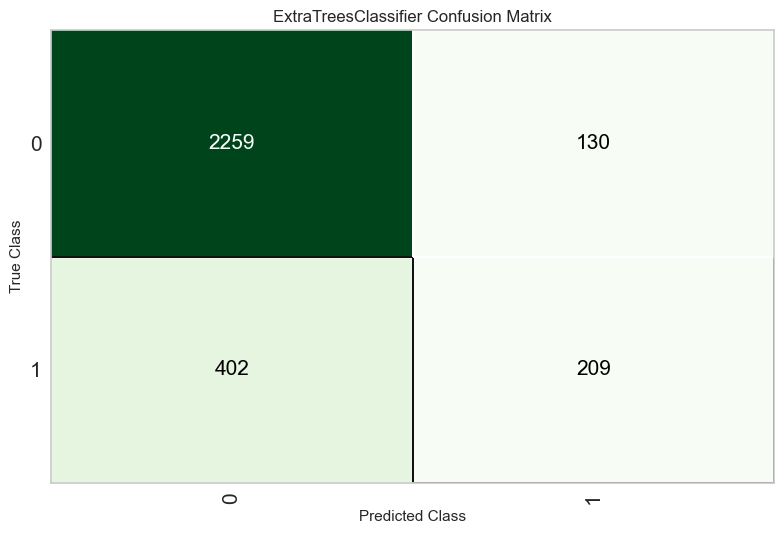

In [11]:
plot_model(tuned_best_model, plot = 'confusion_matrix')

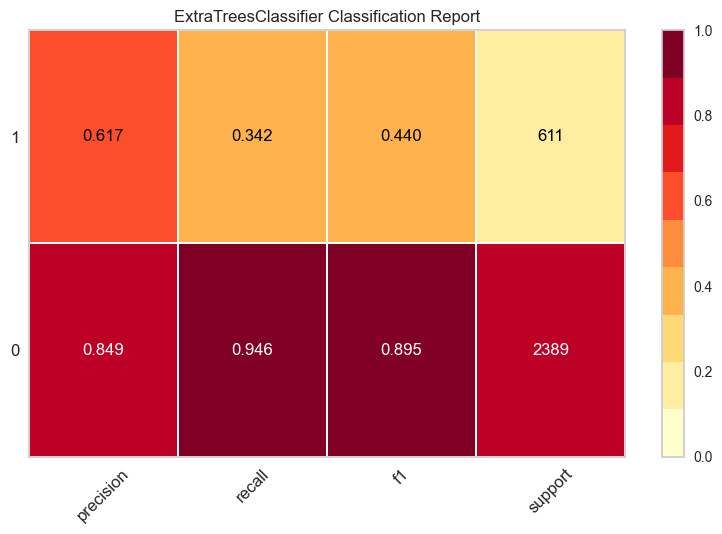

In [12]:
plot_model(tuned_best_model, plot="class_report")